* A Common Error Concerning Kurtosis
* Irving Kaplansky
* Journal of the American Statistical Association, Vol. 40, No. 230 (Jun., 1945), p. 259
* https://psycnet.apa.org/doi/10.2307/2280139

<img src="IMG_5004.jpeg" width=70%>

(f = P, μ = -0.0, σ² = 1.0, μ₄ = 2.75, f₀ = 0.423, η = -0.25)
(f = Q, μ = -0.0, σ² = 1.0, μ₄ = 3.125, f₀ = 0.387, η = 0.125)
(f = R, μ = 0.0, σ² = 1.0, μ₄ = 4.5, f₀ = 0.47, η = 1.5)
(f = S, μ = 0.0, σ² = 1.0, μ₄ = 2.667, f₀ = 0.366, η = -0.333)


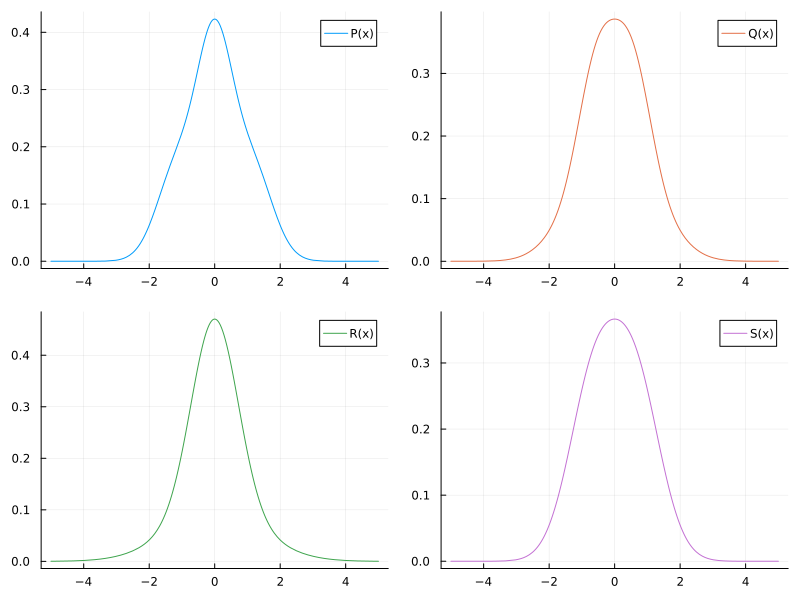

In [1]:
using Distributions
using QuadGK
using StatsPlots
default(fmt=:png)

meanf(f) = quadgk(x -> x*f(x), -Inf, Inf)[1]

function varf(f)
    μ = meanf(f)
    quadgk(x -> (x-μ)^2*f(x), -Inf, Inf)[1]
end

function muf(f, k)
    μ = meanf(f)
    σ = √varf(f)
    quadgk(x -> (x-μ)^k*f(x), -Inf, Inf)[1]/σ^k
end

kurtosisf(f) = muf(f, 4) - 3

P(x) = 1/(3√π) * (9/4 + x^4)*exp(-x^2)
Q(x) = 3/(2√(2π)) * exp(-x^2/2) - 1/2 * P(x)
R(x) = 1/(6√π) * (exp(-x^2/4) + 4exp(-x^2))
S(x) = 3√3/(16√π) * (2 + x^2) * exp(-3x^2/4)

for f in (P, Q, R, S)
    @eval (
        f = $f,
        #one = round(quadgk($f, -Inf, Inf)[1]; digits=3),
        μ = round(meanf($f); digits=3),
        σ² = round(varf($f); digits=3),
        μ₄ = round(muf($f, 4); digits=3),
        f₀ = round($f(0); digits=3),
        η = round(kurtosisf($f); digits=3), 
    ) |> println
end

plot(
    plot(P; label="P(x)", c=1), plot(Q; label="Q(x)", c=2),
    plot(R; label="R(x)", c=3), plot(S; label="S(x)", c=4);
    size=(800, 600), layout=(2,2)
)

quadgk(f, -Inf, Inf) = (1.0000000008907257, 6.05228464673163e-9)
kurtosisf(f) = -0.11008159211764879


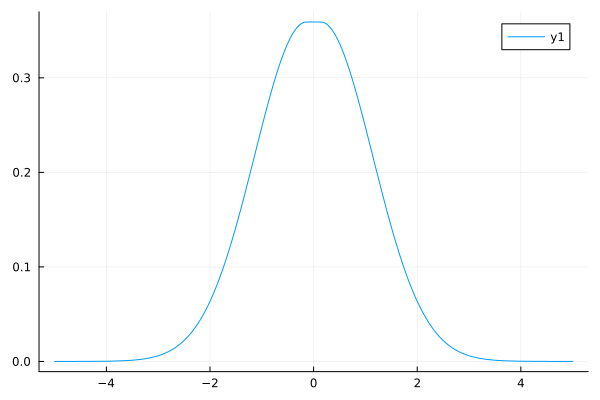

In [2]:
function makef(dist, w=1/2)
    g(x) = (1 - w) * pdf(dist, x)
    g₀ = g(0)
    a = w/(2g₀)
    _f(x) = abs(x) < a ? g₀ : g(sign(x)*(abs(x) - a))
    _f
end

f = makef(Normal(), 0.1)
@show quadgk(f, -Inf, Inf)
@show kurtosisf(f)
plot(f, -5, 5)

quadgk(f, -Inf, Inf) = (1.0000000037842316, 8.883150513905162e-9)
kurtosisf(f) = -0.251937648679617


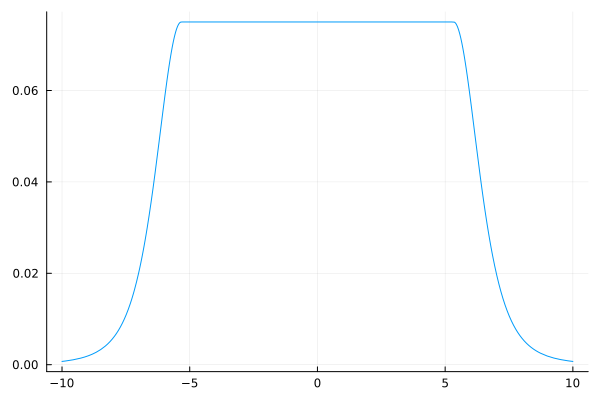

In [3]:
f = makef(TDist(4), 0.8)
@show quadgk(f, -Inf, Inf)
@show kurtosisf(f)
plot(f, -10, 10; label="")

quadgk(f, -Inf, Inf) = (1.000000000011258, 1.2333999599434264e-8)
kurtosisf(f) = 11.999999819230338


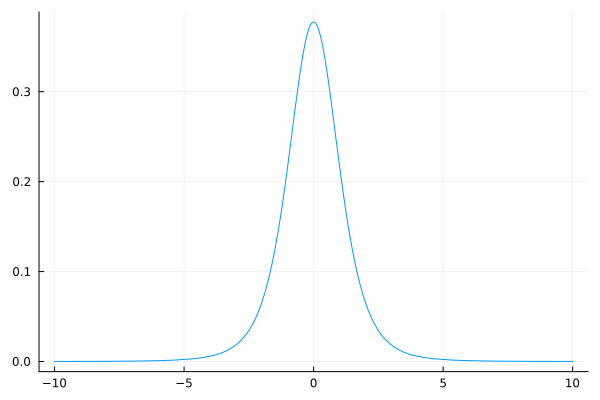

In [4]:
f = makef(TDist(4.5), 0.0)
@show quadgk(f, -Inf, Inf)
@show kurtosisf(f)
plot(f, -10, 10; label="")